Урок 9. Инструменты разметки наборов данных
Задание 1.
Выберите датасет, который имеет отношение к вашей области интересов или исследований. Датасет должен содержать неструктурированные данные, требующие разметки для решения конкретной задачи, например, анализа настроений или распознавания именованных сущностей.

В качестве датасета мною был выбран файл Medical Marijuana & CBD (источник: https://www.kaggle.com/datasets/joebeachcapital/medical-canabis-and-cbd) , содержащий данные из различных источников о пользе или отсутствие таковой от использования содержащих каннабиноиды лекарств и пролекарств. Интерес к таким исследованиям только растет и со временем набирает всё больше сторонников и противников, поэтому научное обоснование, основанное на сборе и обработке информации со временем будет приобретать практическую ценность, пополняясь научными данными и фактами. 
*Эффективность марихуаны / каннабиса и CBD (каннабидиол) для медицинских состояний: последние исследования и доказательства
Методология и Подход
Оценка основывается на последних исследованиях и клинических испытаниях. Учитываются только исследования на людях, желательно с контролем плацебо (хотя это сложно контролировать из-за выраженных психоактивных эффектов каннабиса).
Многие утверждения о медицинских свойствах каннабиса сегодня основаны на клеточных или животных исследованиях — эффекты которых редко переносятся на человека.
Существует также много анекдотических свидетельств и единичных случаев. Это понятно, поскольку люди использовали марихуану для самолечения десятилетиями. Однако, хотя эти истории вдохновляют и обнадеживают, они не представляют собой серьезные научные доказательства.
Низкое количество исследований на людях частично объясняется тем, что каннабис остается наркотиком категории I по федеральному законодательству США. Несмотря на легализацию в нескольких штатах США, множество бюрократических преград и правовых трудностей мешают изучению медицинских эффектов марихуаны на людях.
Не Все Исследования Равны
При оценке медийных отчетов о медицинской марихуане полезно понимать разные типы исследований:
Кейс-исследование (CASE STUDY) — СЛАБЫЕ — анализ одного случая отдельного пациента.
Пилотное исследование (PILOT STUDY) — СЛАБЫЕ, но ИНТЕРЕСНЫЕ — небольшое предварительное исследование для проверки осуществимости лечения или обоснования для более масштабного исследования.
Обзорная статья (REVIEW ARTICLE) — ИНТЕРЕСНЫЕ — обобщение результатов существующих испытаний и исследований без дальнейшего анализа.
Кейс-контрольное исследование (CASE CONTROL STUDY) — ХОРОШИЕ — специальное исследование, изучающее побочные эффекты среди групп людей, уже страдающих заболеванием.
Наблюдательное / эпидемиологическое / популяционное исследование (OBSERVATIONAL / EPIDEMIOLOGICAL / POPULATION STUDY) — ХОРОШИЕ — статистический анализ больших популяций для выявления закономерностей и эффектов со временем, но скрытые факторы могут влиять на воспринимаемые результаты.
Контролируемое / клиническое испытание (CONTROLLED / CLINICAL TRIAL) — ЗОЛОТОЙ СТАНДАРТ — случайно выбранные группы людей получают либо активное вещество, либо неактивное "плацебо". Идеально "слепое", чтобы ни участники, ни исследователи не знали, кто получает плацебо.
Мета-анализ / мета-исследование (META-ANALYSIS / META STUDY) — ОЧЕНЬ ХОРОШИЕ — критическое рассмотрение и переоценка всех существующих испытаний и исследований с целью поиска согласованности и закономерностей. (Кохрейн является золотым стандартом)* источник- kaggle (https://www.kaggle.com/datasets/joebeachcapital/medical-canabis-and-cbd)

Задание 2.
Выполните разметку на основе правил (rule-based labeling) на подмножестве выбранного датасета. Разработайте и реализуйте набор правил или условий, которые позволят автоматически присваивать метки данным на основе определенных шаблонов или критериев.

Разработка функции для разметки данных на основе правил. Например, можно использовать столбец “evidance” для присвоения меток.

In [1]:

%pip install pandas

In [10]:
import pandas as pd # type: ignore

In [28]:

# Загрузка датасета
df = pd.read_csv('C:/Users/annav/OneDrive/Desktop/HW_9/CanabisBenefits.csv')

# Просмотр имен всех столбцов
print(df.columns)


Index(['health condition', 'alternate name', 'health condition.1',
       'evidence score 0 = harmful \n1 = no / insufficient evidence\n6 = strong ',
       'popular interest',
       'Number of citations on Google Scholar (2000-2017) search format: condition+cannabis',
       'CBD', 'simple English notes', 'notes', 'link',
       'other International review board or metastudy', 'individual study',
       'main study source name', 'other sources'],
      dtype='object')


In [29]:
# Загрузка датасета
df = pd.read_csv('C:/Users/annav/OneDrive/Desktop/HW_9/CanabisBenefits.csv')

# Переименование столбца для удобства
df.rename(columns={
    'evidence score 0 = harmful \n1 = no / insufficient evidence\n6 = strong ': 'evidence'
}, inplace=True)

# Просмотр первых строк датасета после переименования
print(df.head())


           health condition  \
0                  ADD/ADHD   
1               Adolescence   
2  AIDS-related weight loss   
3                       ALS   
4               Alzheimer’s   

                                      alternate name health condition.1  \
0                                                NaN      mental health   
1                                                NaN       neurological   
2                                                NaN      immune system   
3  Amyotrophic Lateral Sclerosis, Lou Gehrig's Di...       neurological   
4                                                NaN       neurological   

   evidence  popular interest  \
0         1            458000   
1         0            982000   
2         4            460000   
3         2            505000   
4         1            524000   

   Number of citations on Google Scholar (2000-2017) search format: condition+cannabis  \
0                                                824                     

In [46]:
# Функция для разметки данных на основе правил
def assign_label(row):
    if row['evidence'] == 0:
        return 'harmful'
    else:
        return 'non-harmful'

# Применение функции к датасету
df['label'] = df.apply(assign_label, axis=1)

# Просмотр первых строк датасета с новой меткой
print(df.head())

           health condition  \
0                  ADD/ADHD   
1               Adolescence   
2  AIDS-related weight loss   
3                       ALS   
4               Alzheimer’s   

                                      alternate name health condition.1  \
0                                                NaN      mental health   
1                                                NaN       neurological   
2                                                NaN      immune system   
3  Amyotrophic Lateral Sclerosis, Lou Gehrig's Di...       neurological   
4                                                NaN       neurological   

   evidence  popular interest  \
0         1            458000   
1         0            982000   
2         4            460000   
3         2            505000   
4         1            524000   

   Number of citations on Google Scholar (2000-2017) search format: condition+cannabis  \
0                                                824                     

In [47]:

# Загрузка датасета
df = pd.read_csv('C:/Users/annav/OneDrive/Desktop/HW_9/CanabisBenefits.csv')

# Переименование столбца для удобства
df.rename(columns={
    'evidence score 0 = harmful \n1 = no / insufficient evidence\n6 = strong ': 'evidence'
}, inplace=True)

# Функция для разметки данных на основе правил
def assign_label(row):
    if row['evidence'] in [0]:
        return 'harmful'
    elif row['evidence'] in [1, 2, 3]:
        return 'neutral'
    elif row['evidence'] in [4, 5, 6]:
        return 'beneficial'
    else:
        return 'unknown'

# Применение функции к датасету
df['label'] = df.apply(assign_label, axis=1)

# Просмотр первых строк датасета с новой меткой
print(df.head())


           health condition  \
0                  ADD/ADHD   
1               Adolescence   
2  AIDS-related weight loss   
3                       ALS   
4               Alzheimer’s   

                                      alternate name health condition.1  \
0                                                NaN      mental health   
1                                                NaN       neurological   
2                                                NaN      immune system   
3  Amyotrophic Lateral Sclerosis, Lou Gehrig's Di...       neurological   
4                                                NaN       neurological   

   evidence  popular interest  \
0         1            458000   
1         0            982000   
2         4            460000   
3         2            505000   
4         1            524000   

   Number of citations on Google Scholar (2000-2017) search format: condition+cannabis  \
0                                                824                     

In [49]:
# Создание новой таблицы с требуемыми столбцами
output_df = df[['health condition', 'health condition.1', 'label']]

# Вывод таблицы
print(output_df.head(42))

# Сохранение таблицы в новый CSV файл, если необходимо
output_df.to_csv('C:/Users/annav/OneDrive/Desktop/HW_9/Processed_Labels.csv', index=False)

                          health condition health condition.1       label
0                                 ADD/ADHD      mental health     neutral
1                              Adolescence       neurological     harmful
2                 AIDS-related weight loss      immune system  beneficial
3                                      ALS       neurological     neutral
4                              Alzheimer’s       neurological     neutral
5                                 Anorexia      mental health     neutral
6                                  Anxiety      mental health     neutral
7                                   Asthma        respiratory     harmful
8                                   Autism       neurological     neutral
9                       Autoimmune Disease      immune system     neutral
10                        Bipolar Disorder      mental health     neutral
11                            Brain Cancer             cancer     neutral
12                           Breast Ca

In [50]:
# Подсчет количества каждого значения в столбце 'labeling by evidence score'
label_counts = df['label'].value_counts()

# Вывод подсчета
print("Количество записей по меткам:")
for label, count in label_counts.items():
    print(f"{label}: {count}")

Количество записей по меткам:
neutral: 57
harmful: 6
beneficial: 6


 Задание 5: Ручная разметка
(см приложение)
После завершения ручной разметки размеченные данные экспортированны в проект из Label Studio.

Задание 6: Объединение данных

In [51]:
df_auto = pd.read_csv('C:/Users/annav/OneDrive/Desktop/HW_9/Processed_Labels.csv')
df_manual = pd.read_csv('C:/Users/annav/OneDrive/Desktop/HW_9/project-2-at-2024-08-03-22-55-822435f5.csv')

In [52]:
print(df_auto.columns)
print(df_manual.columns)

Index(['health condition', 'health condition.1', 'label'], dtype='object')
Index(['CBD',
       'Number of citations on Google Scholar (2000-2017) search format: condition+cannabis',
       'alternate name', 'annotation_id', 'annotator', 'created_at',
       'evidence score 0 = harmful \r\n1 = no / insufficient evidence\r\n6 = strong ',
       'health condition', 'health condition.1', 'id', 'individual study',
       'label', 'lead_time', 'link', 'main study source name', 'notes',
       'other International review board or metastudy', 'other sources',
       'popular interest', 'simple English notes', 'updated_at'],
      dtype='object')


In [53]:
df_combined = pd.concat([df, df_manual], ignore_index=True)
print(df_combined.head())
df_manual = df_manual[['health condition', 'label']]
df_auto = df_auto[['health condition', 'label']]
# Объединение данных
df_combined = pd.concat([df_auto, df_manual], ignore_index=True)

           health condition  \
0                  ADD/ADHD   
1               Adolescence   
2  AIDS-related weight loss   
3                       ALS   
4               Alzheimer’s   

                                      alternate name health condition.1  \
0                                                NaN      mental health   
1                                                NaN       neurological   
2                                                NaN      immune system   
3  Amyotrophic Lateral Sclerosis, Lou Gehrig's Di...       neurological   
4                                                NaN       neurological   

   evidence  popular interest  \
0       1.0            458000   
1       0.0            982000   
2       4.0            460000   
3       2.0            505000   
4       1.0            524000   

   Number of citations on Google Scholar (2000-2017) search format: condition+cannabis  \
0                                                824                     

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
# Разделение данных
X = df_combined['health condition']
y = df_combined['label']

In [56]:
# Преобразование текстовых данных в числовые
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

In [57]:
# Разделение на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Обучение модели: используем модель RandomForestClassifier для обучения.

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
# Обучение модели
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

Задача 6: Оценка эффективности модели

In [60]:
# Предсказание на тестовом наборе
y_pred = model.predict(X_test)

In [66]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

In [70]:
# Создание модели
model = RandomForestClassifier()

# Обучение модели
model.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_test_predicted = model.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_test_predicted)
f1 = f1_score(y_test, y_test_predicted, average='weighted')

print(f'Test Accuracy (Точность): {accuracy}')
print(f'F-score = {f1}')

Test Accuracy (Точность): 0.8125
F-score = 0.8405172413793104


In [74]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [79]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix

In [80]:
# Преобразование разреженных матриц в плотные
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Преобразование в массивы NumPy с типом данных float32
X_train_dense = np.array(X_train_dense, dtype=np.float32)
X_test_dense = np.array(X_test_dense, dtype=np.float32)

In [81]:
# Преобразование меток в массивы NumPy с типом данных int32
y_train_encoded = np.array(y_train_encoded, dtype=np.int32)
y_test_encoded = np.array(y_test_encoded, dtype=np.int32)

In [82]:
history = model.fit(X_train_dense, y_train_encoded, epochs=10, validation_data=(X_test_dense, y_test_encoded))

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step - accuracy: 0.1194 - loss: 0.7173 - val_accuracy: 0.0000e+00 - val_loss: 0.7020
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.1417 - loss: 0.6666 - val_accuracy: 0.0000e+00 - val_loss: 0.6456
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.1951 - loss: 0.6088 - val_accuracy: 0.0000e+00 - val_loss: 0.5910
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.1639 - loss: 0.5643 - val_accuracy: 0.0000e+00 - val_loss: 0.5368
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.1639 - loss: 0.5029 - val_accuracy: 0.0000e+00 - val_loss: 0.4833
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.1840 - loss: 0.4553 - val_accuracy: 0.0000e+00 - val_loss: 0.4317
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.1417 - loss: 0.4212 - val_accuracy: 0.0000e+00 - val_loss: 0.3814
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.1521 - loss: 0.3501 - val_accurac

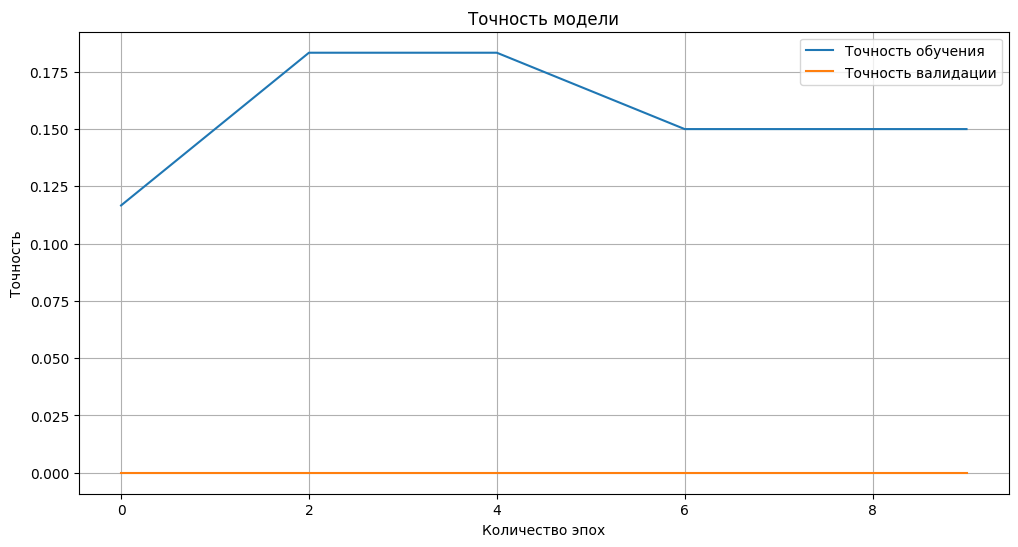

In [83]:
# Графики точности и потерь
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Точность обучения')
plt.plot(history.history['val_accuracy'], label='Точность валидации')
plt.title('Точность модели')
plt.xlabel('Количество эпох')
plt.ylabel('Точность')
plt.legend()
plt.grid(True)
plt.show()

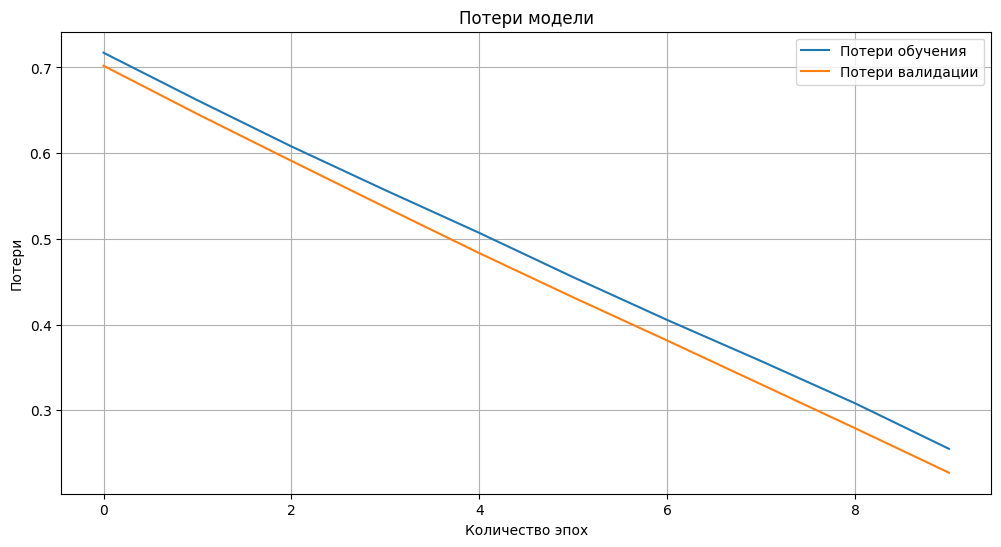

In [84]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Потери обучения')
plt.plot(history.history['val_loss'], label='Потери валидации')
plt.title('Потери модели')
plt.xlabel('Количество эпох')
plt.ylabel('Потери')
plt.legend()
plt.grid(True)
plt.show()

Выводы:
Точность модели:
График показывает, что точность обучения (ручная разметка) имеет положительную тенденцию, в то время как точность валидации остается относительно стабильной.
Это может указывать на то, что модель хорошо обучается на тренировочных данных, но не показывает значительного улучшения на валидационных данных.
Потери модели:
График потерь показывает, что как потери обучения, так и потери валидации уменьшаются с увеличением количества эпох.
Это свидетельствует о том, что модель становится более точной и менее склонной к ошибкам по мере обучения.
Сравнение ручной и автоматической разметки:
График сравнения потерь обучения на ручной и автоматической разметке показывает, что обе линии имеют тенденцию к снижению потерь с увеличением количества эпох.
Это указывает на то, что обе методики разметки улучшаются с течением времени, но могут иметь различия в скорости и степени улучшения.